# [IAPR][iapr]: Lab 2 ‒  Object description


**Group ID:** xx

**Author 1 (sciper):** Student Name 1 (xxxxx)  
**Author 2 (sciper):** Student Name 2 (xxxxx)   
**Author 3 (sciper):** Student Name 3 (xxxxx)   

**Release date:** 26.03.2021  
**Due date:** 23.04.2021 


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as preparation for the final project, which is a practical project which ties together the topics of the course. 

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook !** rerun the notebook from scratch `Kernel` > `Restart & Run All`


[iapr]: https://github.com/LTS5/iapr

## 0. Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [6]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
data_part1 = os.path.join(data_base_path, data_folder, 'part1')
data_part2 = os.path.join(data_base_path, data_folder, 'part2')

tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

---
## Part 1
In the `lab-02-data/part1` folder, you will find 28x28 grey-scale pictures of handwritten "0" and "1".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

Your goal is to extract, from each of those images, a 2-dimensional feature vector (i.e. 2 features) and to plot them all on a 2D graph.
If you have chosen good features, the vectors of the "0"'s should nicely cluster in one part of the plane and those of the "1"'s in another.

Please try:
1. Fourier Descriptors (15pts). 
    1. Implementation (10 pts).
    2. Showing invariance to rotation, translation and scaling (5 pts).
2. Additional method of your choice (5 pts)


**Note:** for the Fourier descriptors, the u_k signal has to be constructed by following the contour point after point. Some pre-processing (image binarization, possibly some Mathematical Morphology) might be useful.

### 1.1 Data visualization

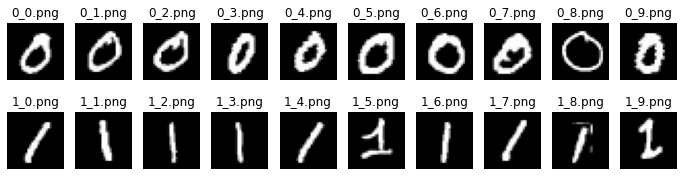

In [7]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

def load(path, digit='0'):
    digit_path = os.path.join(path, digit)
    digit_names = [nm for nm in os.listdir(digit_path) if '.png' in nm]  # make sure to only load .png
    digit_names.sort()  # sort file names
    ic = skimage.io.imread_collection([os.path.join(digit_path, nm) for nm in digit_names])
    digit_im = skimage.io.concatenate_images(ic)
    return digit_im, digit_names
                        
#  Load zeros and ones
zeros_im, zeros_names = load(data_part1, digit='0')
ones_im, ones_names = load(data_part1, digit='1')


# Plot images
fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

### 1.2 Fourier descriptors (15 pts)

In [24]:
from skimage import measure

In [182]:
def find_contours_all(images):
    return np.array([np.array(measure.find_contours(img, level=30, fully_connected="high")) for img in images])

def plot_contours(images, contours_array):
    # Display the image and plot all contours found
    fig, axes = plt.subplots(1, 10, figsize=(15,15))
    
    for i in range(10):
        ax = axes[i]
        img = images[i]
        ax.imshow(img, cmap=plt.cm.gray)
        contours = contours_array[i]

        for con in contours:
            ax.plot(con[:, 1], con[:, 0], c='b', linewidth=2)

        ax.axis('image')
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

/home/nabegh/Anaconda3/envs/kaggle/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


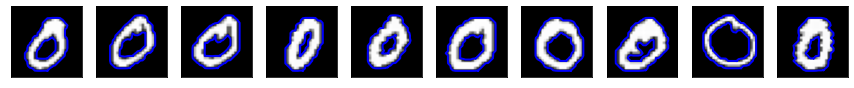

In [183]:
# 
contours_zeros = find_contours_all(zeros_im)

# Display the image and plot all contours found
plot_contours(zeros_im, contours_zero)

/home/nabegh/Anaconda3/envs/kaggle/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


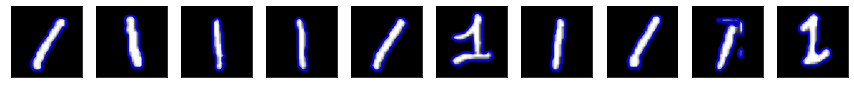

In [184]:
# 
contours_ones = find_contours_all(ones_im)

# Display the image and plot all contours found
plot_contours(ones_im, contours_ones)

In [185]:
max(contours_zero[0], key=len)[:, 0].shape

(75,)

In [186]:
def fourrier_transform(contours):
    contour = max(contours, key=len)
    contour_complex = contour[:, 1] +  contour[:, 0]*1j
    fourier_desc = np.fft.fft(contour_complex)
    return fourier_desc

In [206]:
f_zero = np.array([fourrier_transform(contours) for contours in contours_zeros], dtype=object)
f_one = np.array([fourrier_transform(contours) for contours in contours_ones], dtype=object)

In [207]:
f_zero_choose = []

for img in f_zero:
    f1 = np.abs(img[1])
    f2 = np.abs(img[2])
    f_zero_choose.append(np.array([f1, f2]))
    
f_zero_choose = np.array(f_zero_choose)

In [209]:
f_one_choose = []

for img in f_one:
    f1 = np.abs(img[1])
    f2 = np.abs(img[2])
    f_one_choose.append(np.array([f1, f2]))
    
f_one_choose = np.array(f_one_choose)

In [210]:
f_zero_choose.shape

(10, 2)

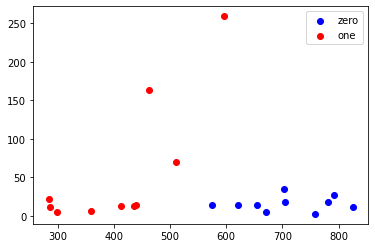

In [213]:
plt.scatter(x=f_zero_choose[:, 0], y=f_zero_choose[:, 1], c='b')
plt.scatter(x=f_one_choose[:, 0], y=f_one_choose[:, 1], c='r')
plt.legend(['zero', 'one'])
plt.show()

### 1.3 Additional method (5 pts)

---
## Part 2
The `lab-02-data/part2` folder contains grey-scale pictures of handwritten "2" and "3".
Extract the same feature (typically 2 Fourier descriptors) as in part 1 also on these images and plot them on the same graph as the features of the "0" and "1".
Is it possible to discriminate all these 4 digits with a 2-dimensional feature vector?

### 2.1 Data visualization

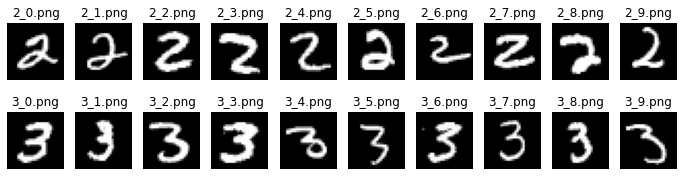

In [3]:
#  Load twos and threes
twos_im, twos_names = load(data_part2, digit='2')
threes_im, threes_names = load(data_part2, digit='3')

# Plot images
fig, axes = plt.subplots(2, len(twos_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], twos_im, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], threes_im, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

### 2.2 Fourier descriptors - 4 digits (10 pts)

In [ ]:
# Add your implementation and discussion